Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Ananya Roy"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [ ]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

# This line of code should work on Windows and Mac
#%env QUANDL_API_KEY = "YOUR_API_KEY"

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
import quandl
quandl.ApiConfig.api_key = "YOUR_API_KEY"

In [ ]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date

start = datetime.datetime(2013, 11, 12)
end = datetime.datetime(2018, 11, 12)

amzn = web.DataReader('WIKI/AMZN', 'quandl', start, end)

### Option 2 - Using Yahoo Finance `yfinance` library

In [4]:
!pip install yfinance

In [6]:
pip install pandas_datareader

In [385]:
## 1. Setup environment

In [12]:
import numpy as np  # For computations
import pandas as pd  # For indexing data

np.random.seed(12345)
import matplotlib.pyplot as plt  # for visualizing  data

plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

# Our temporal data types
from datetime import datetime
from datetime import timedelta

# For grabbing data sets
import requests

# For hiding code blocks, as they aren't necessary at this point
from IPython.display import HTML

In [ ]:
##2. Load "adjusted close prices" data for last 60 months 

In [14]:
# Load Data

amzn = pd.read_csv('amzn_2012-7-31_2017-6-30.csv', usecols=['Date', 'AdjClose'])
fb = pd.read_csv('fb_2012-7-31_2017-6-30.csv', usecols=['Date', 'AdjClose'])
ibm = pd.read_csv('ibm_2012-7-31_2017-6-30.csv', usecols=['Date', 'AdjClose'])
mmm = pd.read_csv('mmm_2012-7-31_2017-6-30.csv', usecols=['Date', 'AdjClose'])

In [16]:
# add a new column with the name of each stock

amzn['Name'] = 'amzn'
fb['Name'] = 'fb'
ibm['Name'] = 'ibm'
mmm['Name'] = 'mmm'

In [434]:
mmm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1238 non-null   object 
 1   AdjClose  1238 non-null   float64
 2   Name      1238 non-null   object 
dtypes: float64(1), object(2)
memory usage: 29.1+ KB


In [18]:
# Merge the DataFrames using pd.concat
merged_df = pd.concat([amzn, fb, ibm, mmm])

# Set 'Name' column as the index
#merged_df.set_index('Name', inplace=True)

# Ensure 'Date' is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

merged_df.head(3)

,Date,AdjClose,Name
0,2017-06-30,968.00,amzn
1,2017-06-29,975.93,amzn
2,2017-06-28,990.33,amzn


In [438]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4952 entries, 0 to 1237
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4952 non-null   datetime64[ns]
 1   AdjClose  4952 non-null   float64       
 2   Name      4952 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 154.8+ KB


In [ ]:
## 3. Resample the data to get prices for the end of the business month

In [28]:
# Ensure 'Date' is in datetime format
amzn['Date'] = pd.to_datetime(amzn['Date'])

# Resample the 'amzn' dataframe to get the end of each business month (BME) and get the last available value for 'AdjClose'
resampled_amzn = amzn.resample('BME', on='Date').last()

# Reset index to make 'Date' a regular column
resampled_amzn.reset_index(inplace=True)

# Display the 'Date' and 'AdjClose' columns from the resampled data
print(resampled_amzn[['Date', 'AdjClose','Name']].head(3))

        Date  AdjClose  Name
0 2012-07-31    233.30  amzn
1 2012-08-31    248.27  amzn
2 2012-09-28    254.32  amzn


In [30]:
# Ensure 'Date' is in datetime format
fb['Date'] = pd.to_datetime(fb['Date'])

resampled_fb = fb.resample('BME', on='Date').last()

# Reset index to make 'Date' a regular column
resampled_fb.reset_index(inplace=True)

# Display the 'Date' and 'AdjClose' columns from the resampled data
print(resampled_fb[['Date', 'AdjClose','Name']].head(3))

        Date  AdjClose Name
0 2012-07-31    21.710   fb
1 2012-08-31    18.058   fb
2 2012-09-28    21.660   fb


In [32]:
# Ensure 'Date' is in datetime format
ibm['Date'] = pd.to_datetime(ibm['Date'])

resampled_ibm = ibm.resample('BME', on='Date').last()

# Reset index to make 'Date' a regular column
resampled_ibm.reset_index(inplace=True)

# Display the 'Date' and 'AdjClose' columns from the resampled data
print(resampled_ibm[['Date', 'AdjClose','Name']].head(3))

        Date    AdjClose Name
0 2012-07-31  167.112403  ibm
1 2012-08-31  166.858424  ibm
2 2012-09-28  177.648345  ibm


In [34]:
# Ensure 'Date' is in datetime format
mmm['Date'] = pd.to_datetime(mmm['Date'])

resampled_mmm = mmm.resample('BME', on='Date').last()

# Reset index to make 'Date' a regular column
resampled_mmm.reset_index(inplace=True)

# Display the 'Date' and 'AdjClose' columns from the resampled data
print(resampled_mmm[['Date', 'AdjClose','Name']].head(3))

        Date   AdjClose Name
0 2012-07-31  80.117221  mmm
1 2012-08-31  81.838026  mmm
2 2012-09-28  81.678945  mmm


In [36]:
# Remove NaN rows from resampled_df
resampled_amzn.dropna(inplace=True)
resampled_fb.dropna(inplace=True)
resampled_ibm.dropna(inplace=True)
resampled_mmm.dropna(inplace=True)

In [38]:
resampled_amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      60 non-null     datetime64[ns]
 1   AdjClose  60 non-null     float64       
 2   Name      60 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ KB


In [40]:
resampled_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      60 non-null     datetime64[ns]
 1   AdjClose  60 non-null     float64       
 2   Name      60 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ KB


In [42]:
resampled_ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      60 non-null     datetime64[ns]
 1   AdjClose  60 non-null     float64       
 2   Name      60 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ KB


In [44]:
resampled_mmm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      60 non-null     datetime64[ns]
 1   AdjClose  60 non-null     float64       
 2   Name      60 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ KB


In [ ]:
## 4. Use the pandas autocorrelation_plot() function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.

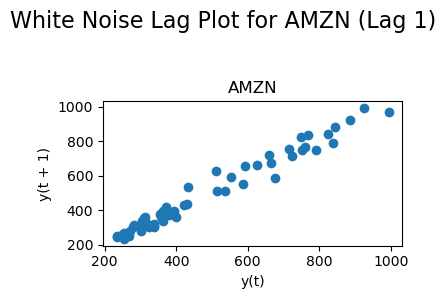

In [46]:
from pandas.plotting import lag_plot

# Define the lag value
lag = 1  # Single lag value

# Create a figure for the lag plot
fig, ax = plt.subplots(figsize=(4, 3))

# Set the title for the plot
fig.suptitle('White Noise Lag Plot for AMZN (Lag 1)', fontsize=16)

# Create the lag plot for the 'AdjClose' of the resampled_amzn dataframe
lag_plot(resampled_amzn['AdjClose'], lag=lag, ax=ax)
ax.set_title('AMZN')

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


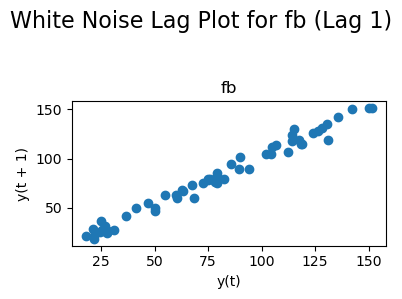

In [48]:
from pandas.plotting import lag_plot

# Define the lag value
lag = 1  # Single lag value

# Create a figure for the lag plot
fig, ax = plt.subplots(figsize=(4, 3))

# Set the title for the plot
fig.suptitle('White Noise Lag Plot for fb (Lag 1)', fontsize=16)

# Create the lag plot for the 'AdjClose' of the resampled_fb dataframe
lag_plot(resampled_fb['AdjClose'], lag=lag, ax=ax)
ax.set_title('fb')

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

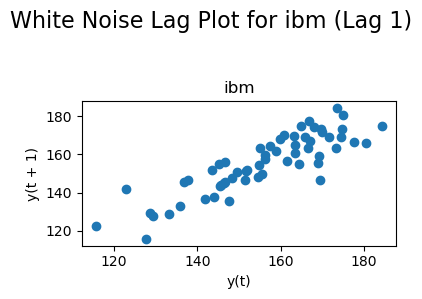

In [50]:
from pandas.plotting import lag_plot

# Define the lag value
lag = 1  # Single lag value

# Create a figure for the lag plot
fig, ax = plt.subplots(figsize=(4, 3))

# Set the title for the plot
fig.suptitle('White Noise Lag Plot for ibm (Lag 1)', fontsize=16)

# Create the lag plot for the 'AdjClose' of the resampled_fb dataframe
lag_plot(resampled_ibm['AdjClose'], lag=lag, ax=ax)
ax.set_title('ibm')

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

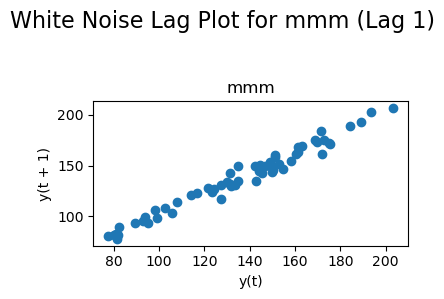

In [52]:
from pandas.plotting import lag_plot

# Define the lag value
lag = 1  # Single lag value

# Create a figure for the lag plot
fig, ax = plt.subplots(figsize=(4, 3))

# Set the title for the plot
fig.suptitle('White Noise Lag Plot for mmm (Lag 1)', fontsize=16)

# Create the lag plot for the 'AdjClose' of the resampled_mmm dataframe
lag_plot(resampled_mmm['AdjClose'], lag=lag, ax=ax)
ax.set_title('mmm')

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

In [ ]:
#4. Are they autocorrelated? Provide short explanation.

## ANSWER:
## From the lag-plot, it appears that there is a positive correlation for all 4 companies. Which means, the stock's price increased with time.
### However, in case of IBM, the data is more sparsed than the other 3 companies.

In [ ]:
# 5. Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using shift() function.
## Use pandas autotocorrelation_plot() to plot the autocorrelation of the monthly returns.
### Are the returns autocorrelated? Provide short explanation.

In [54]:
# Create a new DataFrame by filtering only Amazon's data
#resampled_amzn = resampled_df[resampled_df['Name'] == 'amzn'].copy()

# Drop the 'Name' column from the new DataFrame
resampled_amzn.drop(columns='Name', inplace=True)

# Display the first few rows of the new DataFrame
resampled_amzn.head(3)

,Date,AdjClose
0,2012-07-31,233.30
1,2012-08-31,248.27
2,2012-09-28,254.32


In [56]:
# Set 'Date' as the index (if not already set)
resampled_amzn.set_index('Date', inplace=True)

# Sort by the 'Date' index in ascending order
resampled_amzn_sort = resampled_amzn.sort_index(ascending=True)

# Display the sorted dataframe
resampled_amzn_sort.head()

,AdjClose
Date,
2012-07-31,233.3000
2012-08-31,248.2700
2012-09-28,254.3200
2012-10-31,232.8931
2012-11-30,252.0500


In [470]:
# With shift(), we can shift the `TimeSeries` (not the time range)

amzn_mreturn = {"beforeShift":resampled_amzn_sort, "afterShift" : resampled_amzn_sort['AdjClose'].shift(1),
 "MonthlyReturn" : resampled_amzn_sort['AdjClose'] / resampled_amzn_sort['AdjClose'].shift(1)}


amzn_mreturn

{'beforeShift':             AdjClose
 Date                
 2012-07-31  233.3000
 2012-08-31  248.2700
 2012-09-28  254.3200
 2012-10-31  232.8931
 2012-11-30  252.0500
 ...              ...
 2017-02-28  845.0400
 2017-03-31  886.5400
 2017-04-28  924.9900
 2017-05-31  994.6200
 2017-06-30  968.0000
 
 [60 rows x 1 columns],
 'afterShift': Date
 2012-07-31         NaN
 2012-08-31    233.3000
 2012-09-28    248.2700
 2012-10-31    254.3200
 2012-11-30    232.8931
                 ...   
 2017-02-28    823.4800
 2017-03-31    845.0400
 2017-04-28    886.5400
 2017-05-31    924.9900
 2017-06-30    994.6200
 Name: AdjClose, Length: 60, dtype: float64,
 'MonthlyReturn': Date
 2012-07-31         NaN
 2012-08-31    1.064166
 2012-09-28    1.024369
 2012-10-31    0.915748
 2012-11-30    1.082256
                 ...   
 2017-02-28    1.026182
 2017-03-31    1.049110
 2017-04-28    1.043371
 2017-05-31    1.075276
 2017-06-30    0.973236
 Name: AdjClose, Length: 60, dtype: float64}

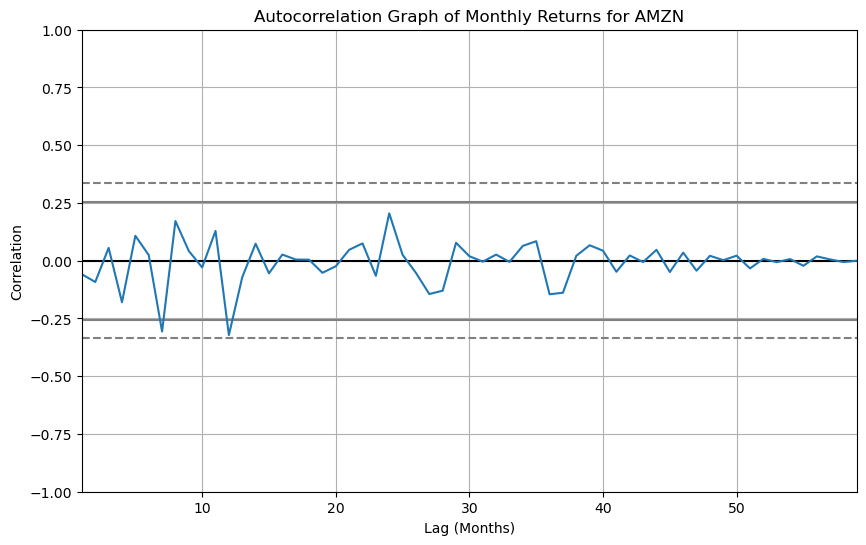

In [58]:
# Ensure the 'MonthlyReturn' is calculated
amzn_mreturn_df = pd.DataFrame({
    "AdjClose": resampled_amzn_sort['AdjClose'],
    "AfterShift": resampled_amzn_sort['AdjClose'].shift(1)
})
amzn_mreturn_df["MonthlyReturn"] = amzn_mreturn_df["AdjClose"] / amzn_mreturn_df["AfterShift"] - 1
amzn_mreturn_df.dropna(inplace=True)

# Generate autocorrelation plot
aWNTimePlot = pd.plotting.autocorrelation_plot(amzn_mreturn_df["MonthlyReturn"])
aWNTimePlot.set_title("Autocorrelation Graph of Monthly Returns for AMZN")
aWNTimePlot.set_ylabel("Correlation")
aWNTimePlot.set_xlabel("Lag (Months)")

plt.show()


In [60]:
# Create a new DataFrame by filtering only Amazon's data
#resampled_fb = resampled_df[resampled_df['Name'] == 'fb'].copy()

# Drop the 'Name' column from the new DataFrame
resampled_fb.drop(columns='Name', inplace=True)

# Display the first few rows of the new DataFrame
resampled_fb.head(3)

,Date,AdjClose
0,2012-07-31,21.710
1,2012-08-31,18.058
2,2012-09-28,21.660


In [62]:
# Set 'Date' as the index (if not already set)
resampled_fb.set_index('Date', inplace=True)

# Sort by the 'Date' index in ascending order
resampled_fb_sort = resampled_fb.sort_index(ascending=True)

# Display the sorted dataframe
resampled_fb_sort.head()


,AdjClose
Date,
2012-07-31,21.710
2012-08-31,18.058
2012-09-28,21.660
2012-10-31,21.110
2012-11-30,28.000


In [64]:
# With shift(), we can shift the `TimeSeries` (not the time range)

fb_mreturn = {"beforeShift":resampled_fb_sort, "afterShift" : resampled_fb_sort['AdjClose'].shift(1),
 "MonthlyReturn" : resampled_fb_sort['AdjClose'] / resampled_fb_sort['AdjClose'].shift(1)}


fb_mreturn

{'beforeShift':             AdjClose
 Date                
 2012-07-31    21.710
 2012-08-31    18.058
 2012-09-28    21.660
 2012-10-31    21.110
 2012-11-30    28.000
 ...              ...
 2017-02-28   135.540
 2017-03-31   142.050
 2017-04-28   150.250
 2017-05-31   151.460
 2017-06-30   150.980
 
 [60 rows x 1 columns],
 'afterShift': Date
 2012-07-31        NaN
 2012-08-31     21.710
 2012-09-28     18.058
 2012-10-31     21.660
 2012-11-30     21.110
                ...   
 2017-02-28    130.320
 2017-03-31    135.540
 2017-04-28    142.050
 2017-05-31    150.250
 2017-06-30    151.460
 Name: AdjClose, Length: 60, dtype: float64,
 'MonthlyReturn': Date
 2012-07-31         NaN
 2012-08-31    0.831783
 2012-09-28    1.199468
 2012-10-31    0.974608
 2012-11-30    1.326386
                 ...   
 2017-02-28    1.040055
 2017-03-31    1.048030
 2017-04-28    1.057726
 2017-05-31    1.008053
 2017-06-30    0.996831
 Name: AdjClose, Length: 60, dtype: float64}

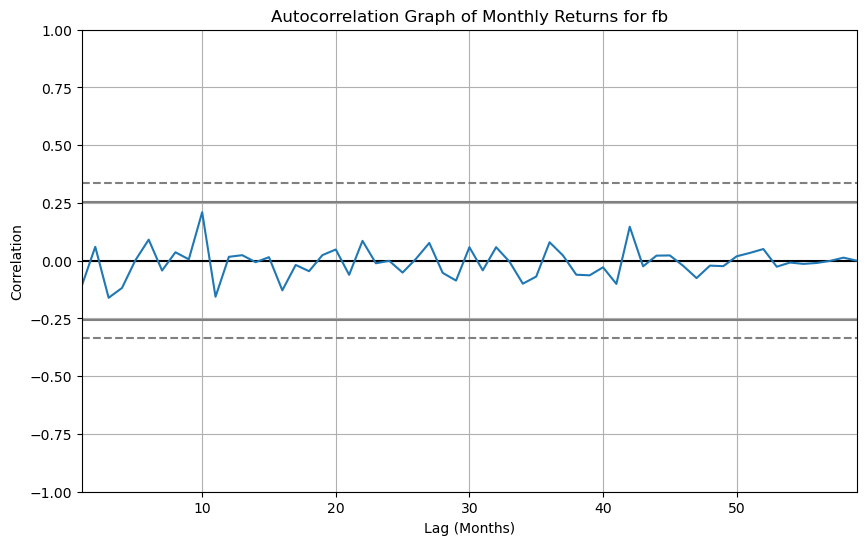

In [66]:
# Ensure the 'MonthlyReturn' is calculated
fb_mreturn_df = pd.DataFrame({
    "AdjClose": resampled_fb_sort['AdjClose'],
    "AfterShift": resampled_fb_sort['AdjClose'].shift(1)
})
fb_mreturn_df["MonthlyReturn"] = fb_mreturn_df["AdjClose"] / fb_mreturn_df["AfterShift"] - 1
fb_mreturn_df.dropna(inplace=True)

# Generate autocorrelation plot
aWNTimePlot = pd.plotting.autocorrelation_plot(fb_mreturn_df["MonthlyReturn"])
aWNTimePlot.set_title("Autocorrelation Graph of Monthly Returns for fb")
aWNTimePlot.set_ylabel("Correlation")
aWNTimePlot.set_xlabel("Lag (Months)")

plt.show()

In [68]:
# Create a new DataFrame by filtering only Amazon's data
#resampled_ibm = resampled_df[resampled_df['Name'] == 'ibm'].copy()

# Drop the 'Name' column from the new DataFrame
resampled_ibm.drop(columns='Name', inplace=True)

# Display the first few rows of the new DataFrame
resampled_ibm.head(3)

,Date,AdjClose
0,2012-07-31,167.112403
1,2012-08-31,166.858424
2,2012-09-28,177.648345


In [70]:
# Set 'Date' as the index (if not already set)
resampled_ibm.set_index('Date', inplace=True)

# Sort by the 'Date' index in ascending order
resampled_ibm_sort = resampled_ibm.sort_index(ascending=True)

# Display the sorted dataframe
resampled_ibm_sort.head()

,AdjClose
Date,
2012-07-31,167.112403
2012-08-31,166.858424
2012-09-28,177.648345
2012-10-31,166.584394
2012-11-30,163.488846


In [72]:
# With shift(), we can shift the `TimeSeries` (not the time range)

ibm_mreturn = {"beforeShift":resampled_ibm_sort, "afterShift" : resampled_ibm_sort['AdjClose'].shift(1),
 "MonthlyReturn" : resampled_ibm_sort['AdjClose'] / resampled_ibm_sort['AdjClose'].shift(1)}


ibm_mreturn

{'beforeShift':               AdjClose
 Date                  
 2012-07-31  167.112403
 2012-08-31  166.858424
 2012-09-28  177.648345
 2012-10-31  166.584394
 2012-11-30  163.488846
 ...                ...
 2017-02-28  174.473283
 2017-03-31  168.962171
 2017-04-28  155.523983
 2017-05-31  149.543338
 2017-06-30  150.719070
 
 [60 rows x 1 columns],
 'afterShift': Date
 2012-07-31           NaN
 2012-08-31    167.112403
 2012-09-28    166.858424
 2012-10-31    177.648345
 2012-11-30    166.584394
                  ...    
 2017-02-28    167.995831
 2017-03-31    174.473283
 2017-04-28    168.962171
 2017-05-31    155.523983
 2017-06-30    149.543338
 Name: AdjClose, Length: 60, dtype: float64,
 'MonthlyReturn': Date
 2012-07-31         NaN
 2012-08-31    0.998480
 2012-09-28    1.064665
 2012-10-31    0.937720
 2012-11-30    0.981418
                 ...   
 2017-02-28    1.038557
 2017-03-31    0.968413
 2017-04-28    0.920466
 2017-05-31    0.961545
 2017-06-30    1.007862
 Name: Ad

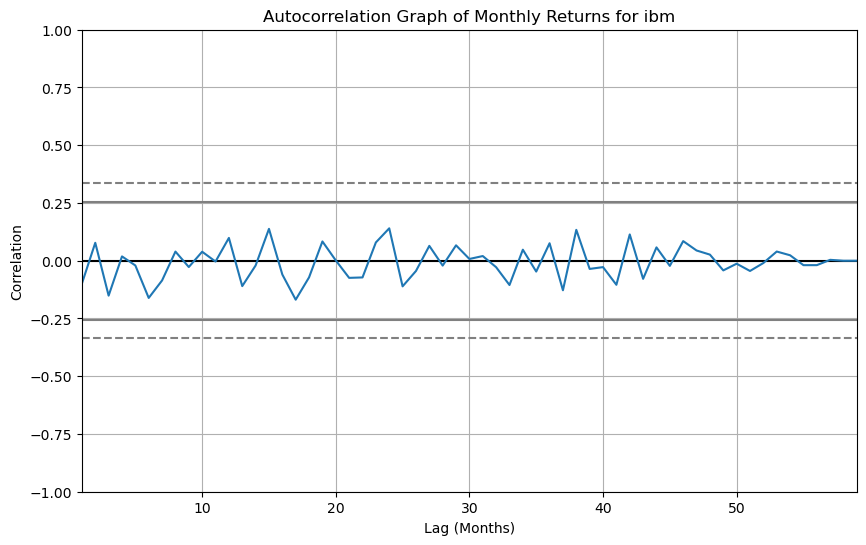

In [74]:
# Ensure the 'MonthlyReturn' is calculated
ibm_mreturn_df = pd.DataFrame({
    "AdjClose": resampled_ibm_sort['AdjClose'],
    "AfterShift": resampled_ibm_sort['AdjClose'].shift(1)
})
ibm_mreturn_df["MonthlyReturn"] = ibm_mreturn_df["AdjClose"] / ibm_mreturn_df["AfterShift"] - 1
ibm_mreturn_df.dropna(inplace=True)

# Generate autocorrelation plot
aWNTimePlot = pd.plotting.autocorrelation_plot(ibm_mreturn_df["MonthlyReturn"])
aWNTimePlot.set_title("Autocorrelation Graph of Monthly Returns for ibm")
aWNTimePlot.set_ylabel("Correlation")
aWNTimePlot.set_xlabel("Lag (Months)")

plt.show()

In [76]:
# Create a new DataFrame by filtering only Amazon's data
#resampled_mmm = resampled_df[resampled_df['Name'] == 'mmm'].copy()

# Drop the 'Name' column from the new DataFrame
resampled_mmm.drop(columns='Name', inplace=True)

# Display the first few rows of the new DataFrame
resampled_mmm.head(3)

,Date,AdjClose
0,2012-07-31,80.117221
1,2012-08-31,81.838026
2,2012-09-28,81.678945


In [78]:
# Set 'Date' as the index (if not already set)
resampled_mmm.set_index('Date', inplace=True)

# Sort by the 'Date' index in ascending order
resampled_mmm_sort = resampled_mmm.sort_index(ascending=True)

# Display the sorted dataframe
resampled_mmm_sort.head()

,AdjClose
Date,
2012-07-31,80.117221
2012-08-31,81.838026
2012-09-28,81.678945
2012-10-31,77.419126
2012-11-30,80.912524


In [80]:
# With shift(), we can shift the `TimeSeries` (not the time range)

mmm_mreturn = {"beforeShift":resampled_mmm_sort, "afterShift" : resampled_mmm_sort['AdjClose'].shift(1),
 "MonthlyReturn" : resampled_mmm_sort['AdjClose'] / resampled_mmm_sort['AdjClose'].shift(1)}


mmm_mreturn

{'beforeShift':               AdjClose
 Date                  
 2012-07-31   80.117221
 2012-08-31   81.838026
 2012-09-28   81.678945
 2012-10-31   77.419126
 2012-11-30   80.912524
 ...                ...
 2017-02-28  184.165220
 2017-03-31  189.086834
 2017-04-28  193.534075
 2017-05-31  203.291397
 2017-06-30  206.989955
 
 [60 rows x 1 columns],
 'afterShift': Date
 2012-07-31           NaN
 2012-08-31     80.117221
 2012-09-28     81.838026
 2012-10-31     81.678945
 2012-11-30     77.419126
                  ...    
 2017-02-28    171.660322
 2017-03-31    184.165220
 2017-04-28    189.086834
 2017-05-31    193.534075
 2017-06-30    203.291397
 Name: AdjClose, Length: 60, dtype: float64,
 'MonthlyReturn': Date
 2012-07-31         NaN
 2012-08-31    1.021479
 2012-09-28    0.998056
 2012-10-31    0.947847
 2012-11-30    1.045123
                 ...   
 2017-02-28    1.072847
 2017-03-31    1.026724
 2017-04-28    1.023520
 2017-05-31    1.050417
 2017-06-30    1.018193
 Name: Ad

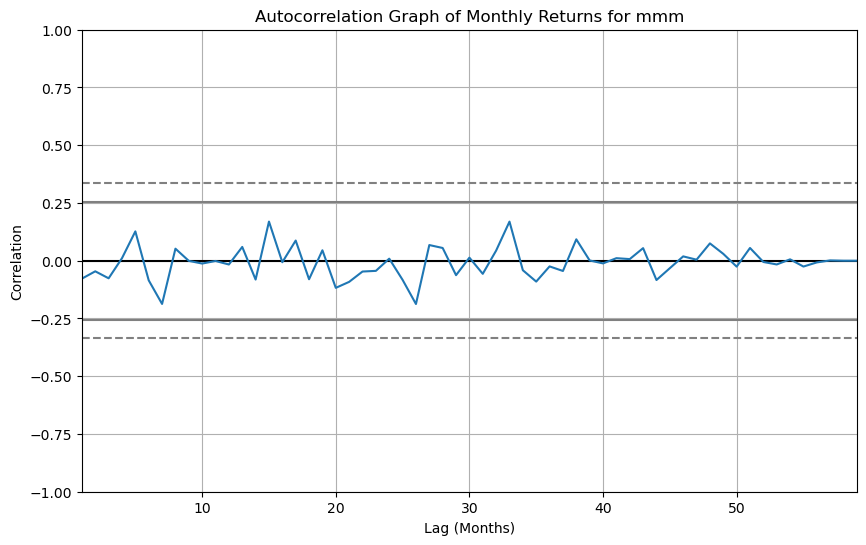

In [82]:
# Ensure the 'MonthlyReturn' is calculated
mmm_mreturn_df = pd.DataFrame({
    "AdjClose": resampled_mmm_sort['AdjClose'],
    "AfterShift": resampled_mmm_sort['AdjClose'].shift(1)
})
mmm_mreturn_df["MonthlyReturn"] = mmm_mreturn_df["AdjClose"] / mmm_mreturn_df["AfterShift"] - 1
mmm_mreturn_df.dropna(inplace=True)

# Generate autocorrelation plot
aWNTimePlot = pd.plotting.autocorrelation_plot(mmm_mreturn_df["MonthlyReturn"])
aWNTimePlot.set_title("Autocorrelation Graph of Monthly Returns for mmm")
aWNTimePlot.set_ylabel("Correlation")
aWNTimePlot.set_xlabel("Lag (Months)")

plt.show()

In [ ]:
# Explantion:
## From the autocorrelation plots of the 4 company's Monthly return, it can be seen that there is almost a stationary autocorrelation. 
## However, the lag periods do not show zero correlation.

In [ ]:
# 6. Combine all 4 time series (returns) into a single DataFrame,
# Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use scatter_matrix() function from pandas.plotting).
#Explain the results. Is there any correlation?

In [104]:
# Reset the index to move 'Name' from the index to a regular column
amzn_mreturn_df = amzn_mreturn_df.reset_index()
fb_mreturn_df = fb_mreturn_df.reset_index()
ibm_mreturn_df = ibm_mreturn_df.reset_index()
mmm_mreturn_df = mmm_mreturn_df.reset_index()

# Add a 'Name' column to each DataFrame (if not already present)
amzn_mreturn_df["Name"] = "AMZN"
fb_mreturn_df["Name"] = "FB"
ibm_mreturn_df["Name"] = "IBM"
mmm_mreturn_df["Name"] = "MMM"

# Combine all DataFrames into one while keeping the 'Date' and 'Name' columns
combined_df = pd.concat([amzn_mreturn_df, fb_mreturn_df, ibm_mreturn_df, mmm_mreturn_df])

# Reset index for the combined DataFrame if needed
combined_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the combined DataFrame
print(combined_df.head())


        Date  AdjClose  AfterShift  MonthlyReturn  Name
0 2012-08-31  248.2700    233.3000       0.064166  AMZN
1 2012-09-28  254.3200    248.2700       0.024369  AMZN
2 2012-10-31  232.8931    254.3200      -0.084252  AMZN
3 2012-11-30  252.0500    232.8931       0.082256  AMZN
4 2012-12-31  250.8700    252.0500      -0.004682  AMZN


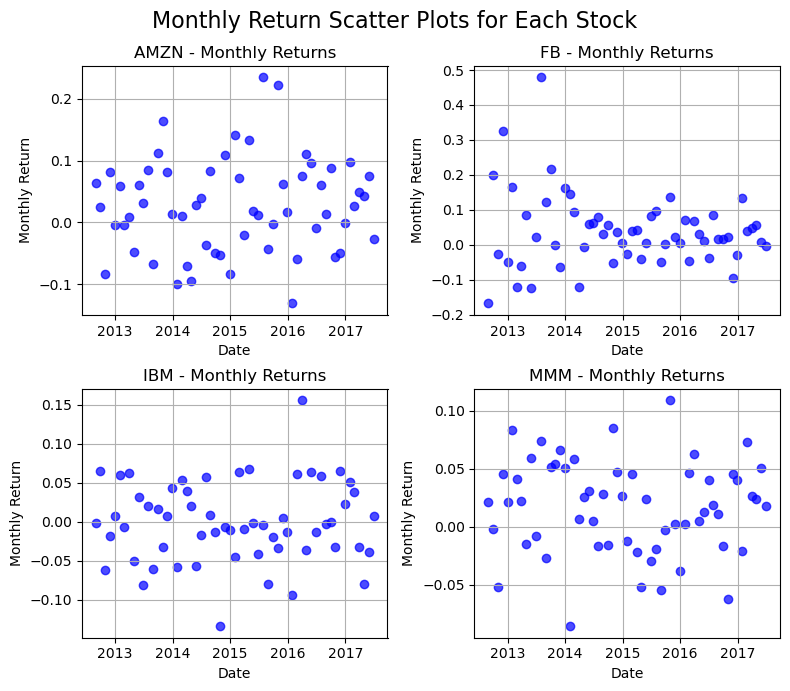

In [116]:
# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(8, 7))

# List of stock names
stocks = ['AMZN', 'FB', 'IBM', 'MMM']

# Loop through the stocks and create scatter plots for each
for i, stock in enumerate(stocks):
    # Filter data for each stock
    stock_data = combined_df[combined_df['Name'] == stock]
    
    # Scatter plot for Monthly Return
    ax = axes[i // 2, i % 2]
    ax.scatter(stock_data['Date'], stock_data['MonthlyReturn'], alpha=0.7, color='blue')
    
    # Set title and labels
    ax.set_title(f'{stock} - Monthly Returns', fontsize=12)
    ax.set_xlabel('Date')
    ax.set_ylabel('Monthly Return')
    ax.grid(True)

# Adjust layout for clarity
plt.tight_layout()
plt.suptitle('Monthly Return Scatter Plots for Each Stock', fontsize=16)
plt.subplots_adjust(top=0.9)  # Adjust the top space to fit the suptitle

# Show the plot
plt.show()


In [ ]:
# Explantion:
## From the scatter plots of the 4 company's Monthly return, it can be seen that there is no correlation.